In [61]:
import pandas as pd
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import seaborn

import math
import matplotlib.pyplot as plt 

In [62]:
data = pd.read_excel('/home/daniel/Desktop/Projetos/mql_python/Relatório 1/dados_relatorio.xlsx')

In [63]:
# kk = ['close IBOV', 'close ABEV3', 'close AZUL4', 'close B3SA3',
#        'close BBAS3', 'close BBDC3', 'close BBDC4', 'close BBSE3',
#        'close BEEF3', 'close BPAC11', 'close BRAP4', 'close BRDT3',
#        'close BRFS3', 'close BRKM5', 'close BRML3', 'close BTOW3',
#        'close CCRO3', 'close CIEL3', 'close CMIG4', 'close COGN3',
#        'close CPFE3', 'close CRFB3', 'close CSAN3', 'close CSNA3',
#        'close CVCB3', 'close CYRE3', 'close ECOR3', 'close EGIE3',
#        'close ELET3', 'close ELET6', 'close EMBR3', 'close ENBR3',
#        'close ENGI11', 'close EQTL3', 'close FLRY3', 'close GGBR4',
#        'close GNDI3', 'close GOAU4', 'close GOLL4', 'close HAPV3',
#        'close HGTX3', 'close HYPE3', 'close IGTA3', 'close IRBR3',
#        'close ITSA4', 'close ITUB4', 'close JBSS3', 'close KLBN11',
#        'close LAME4', 'close LREN3', 'close MGLU3', 'close MRFG3',
#        'close MRVE3', 'close MULT3', 'close NTCO3', 'close PETR3',
#        'close PETR4', 'close QUAL3', 'close RADL3', 'close RAIL3',
#        'close RENT3', 'close SANB11', 'close SBSP3', 'close SULA11',
#        'close SUZB3', 'close TAEE11', 'close TIMP3', 'close TOTS3',
#        'close UGPA3', 'close USIM5', 'close VALE3', 'close VIVT4',
#        'close VVAR3', 'close WEGE3', 'close YDUQ3']

data = data[['close ITSA4', 'close BBAS3', 'close BRML3', 'close ELET3', 'close GGBR4', 'close IGTA3', 'close LREN3', 'close PETR4', 'close SULA11', 'close VALE3']]

In [64]:
data = data.pct_change()[1:]

In [65]:
data

,close ITSA4,close BBAS3,close BRML3,close ELET3,close GGBR4,close IGTA3,close LREN3,close PETR4,close SULA11,close VALE3
1,0.000000,-0.004759,-0.005474,0.044808,0.016591,0.008217,-0.011204,0.006956,-0.007101,0.006770
2,-0.002618,-0.010929,-0.044037,-0.020422,0.015579,-0.018182,0.033994,-0.011690,0.002384,-0.026577
3,0.005249,-0.024862,-0.007678,-0.009729,0.010226,0.006386,0.013699,0.001075,-0.013080,-0.008553
4,0.005222,0.007790,-0.005803,0.005614,-0.003615,0.000635,0.005405,0.013426,0.003614,-0.001327
5,0.015584,0.021082,0.010700,-0.020237,0.037736,0.000634,0.036290,0.011659,0.007203,-0.001329
...,...,...,...,...,...,...,...,...,...,...
1970,-0.008895,-0.001978,-0.002778,0.003048,0.048246,0.014291,0.001264,-0.011586,0.001787,0.014578
1971,0.006731,0.030327,0.011699,0.069890,0.016213,0.017417,0.007035,0.008038,0.013916,-0.003919
1972,0.017831,0.011351,0.006608,-0.015492,0.021616,0.025005,0.015046,0.013289,0.013549,0.003934
1973,-0.004380,-0.004375,-0.016411,-0.004196,-0.000504,-0.010321,-0.013587,-0.000984,0.014931,0.000187


In [66]:
X,Y = data['close BBAS3'][400:700],data['close ITSA4'][400:700]
S1,S2 = X, Y

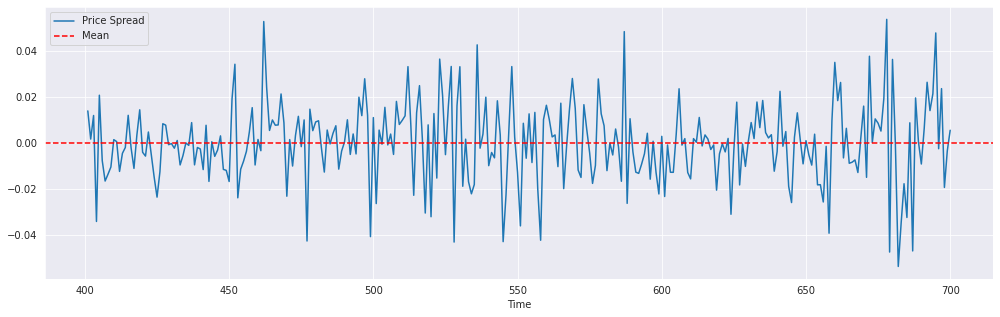

In [67]:
plt.figure(figsize=[17,5])
(Y - X).plot() # Plot the spread
plt.axhline((Y - X).mean(), color='red', linestyle='--') # Add the mean
plt.xlabel('Time')
plt.legend(['Price Spread', 'Mean']);

In [68]:
score, pvalue, _ = coint(X,Y)
print(pvalue)

2.0417885393269894e-29


In [69]:
X.corr(Y)

0.758641772398964

In [70]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

## Checking for cointegration

<AxesSubplot:>

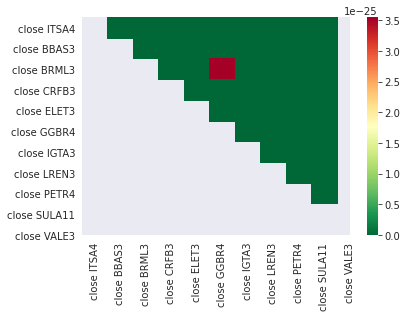

In [71]:
scores, pvalues, pairs = find_cointegrated_pairs(data)
symbol_list = ['close ITSA4', 'close BBAS3', 'close BRML3', 'close CRFB3', 'close ELET3', 'close GGBR4', 'close IGTA3', 'close LREN3', 'close PETR4', 'close SULA11', 'close VALE3']
import seaborn
seaborn.heatmap(pvalues, xticklabels=symbol_list, yticklabels=symbol_list, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.05)
                )

## Calculating the spread by linear regression

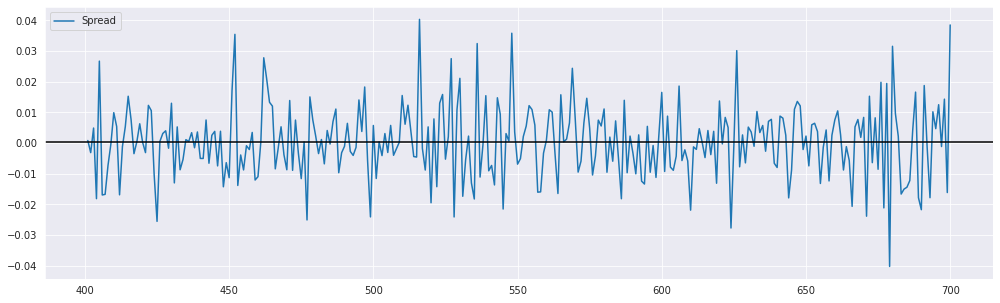

In [93]:
plt.figure(figsize=[17,5])
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['close BBAS3']
b = results.params['close BBAS3']
spread = S2 - b * S1
spread.plot()
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread']);


In [97]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            close ITSA4   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     404.1
Date:                Tue, 21 Jul 2020   Prob (F-statistic):           2.15e-57
Time:                        11:42:02   Log-Likelihood:                 903.22
No. Observations:                 300   AIC:                            -1802.
Df Residuals:                     298   BIC:                            -1795.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0004      0.001      0.608      0.544      -0.001       0.002
close BBAS3     0.5285      0.026     20.101      0.000       0.477       0.580
==============================================================================
Omnibus:                       10.028   Durbin-Watson:                   2.284
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               13.603
Skew:                           0.262   Prob(JB):                      0.00111
Kurtosis:                       3.902   Cond. No.                         38.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### By ratio 

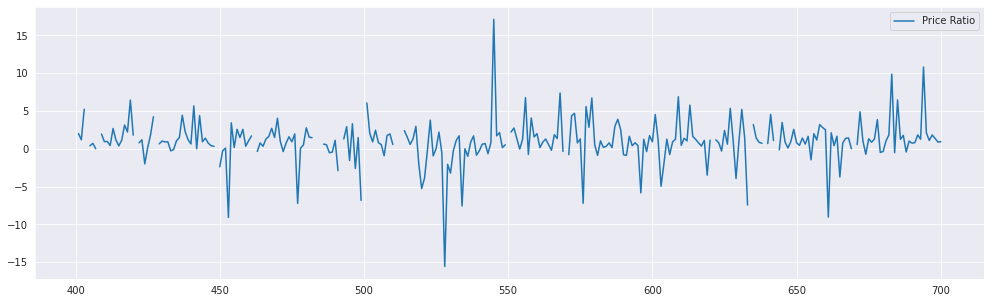

In [73]:
plt.figure(figsize=[17,5])

ratio = S1/S2
ratio.plot()
plt.axhline(ratio.mean(), color='black')
plt.legend(['Price Ratio']);

In [74]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

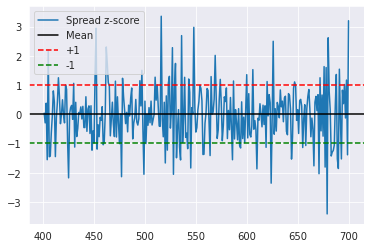

In [75]:
zscore(spread).plot()
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1']);

## Moving window


In [113]:
dados = pd.read_excel('/home/daniel/Desktop/Projetos/mql_python/Relatório 1/dados_relatorio.xlsx')
dados = dados[['close ITSA4', 'close BBAS3', 'close BRML3', 'close ELET3', 'close GGBR4', 'close IGTA3', 'close LREN3', 'close PETR4', 'close SULA11', 'close VALE3']]
dados = dados.pct_change()[1:]

In [114]:
dados.head()

,close ITSA4,close BBAS3,close BRML3,close ELET3,close GGBR4,close IGTA3,close LREN3,close PETR4,close SULA11,close VALE3
1,0.000000,-0.004759,-0.005474,0.044808,0.016591,0.008217,-0.011204,0.006956,-0.007101,0.006770
2,-0.002618,-0.010929,-0.044037,-0.020422,0.015579,-0.018182,0.033994,-0.011690,0.002384,-0.026577
3,0.005249,-0.024862,-0.007678,-0.009729,0.010226,0.006386,0.013699,0.001075,-0.013080,-0.008553
4,0.005222,0.007790,-0.005803,0.005614,-0.003615,0.000635,0.005405,0.013426,0.003614,-0.001327
5,0.015584,0.021082,0.010700,-0.020237,0.037736,0.000634,0.036290,0.011659,0.007203,-0.001329


In [122]:
tickers = ['close PETR4','close VALE3']

S1 = dados[tickers[0]]
S2 = dados[tickers[1]]

S1 = sm.add_constant(S1)
results = sm.OLS(S2,S1).fit()
S1 = S1[tickers[0]]

beta = results.params[tickers[0]]

<AxesSubplot:>

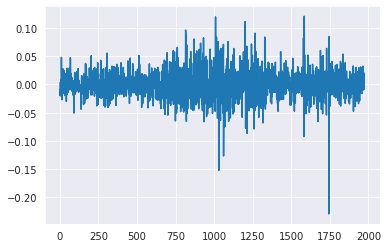

In [123]:
spread = S2 - b * S1
spread.plot()

In [ ]:
plt.figure(figsize=[17,5])
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['close BBAS3']
b = results.params['close BBAS3']
spread = S2 - b * S1
spread.plot()
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread']);


In [150]:
S2.iloc[:]

1       0.006770
2      -0.026577
3      -0.008553
4      -0.001327
5      -0.001329
          ...   
1970    0.014578
1971   -0.003919
1972    0.003934
1973    0.000187
1974   -0.005597
Name: close VALE3, Length: 1974, dtype: float64

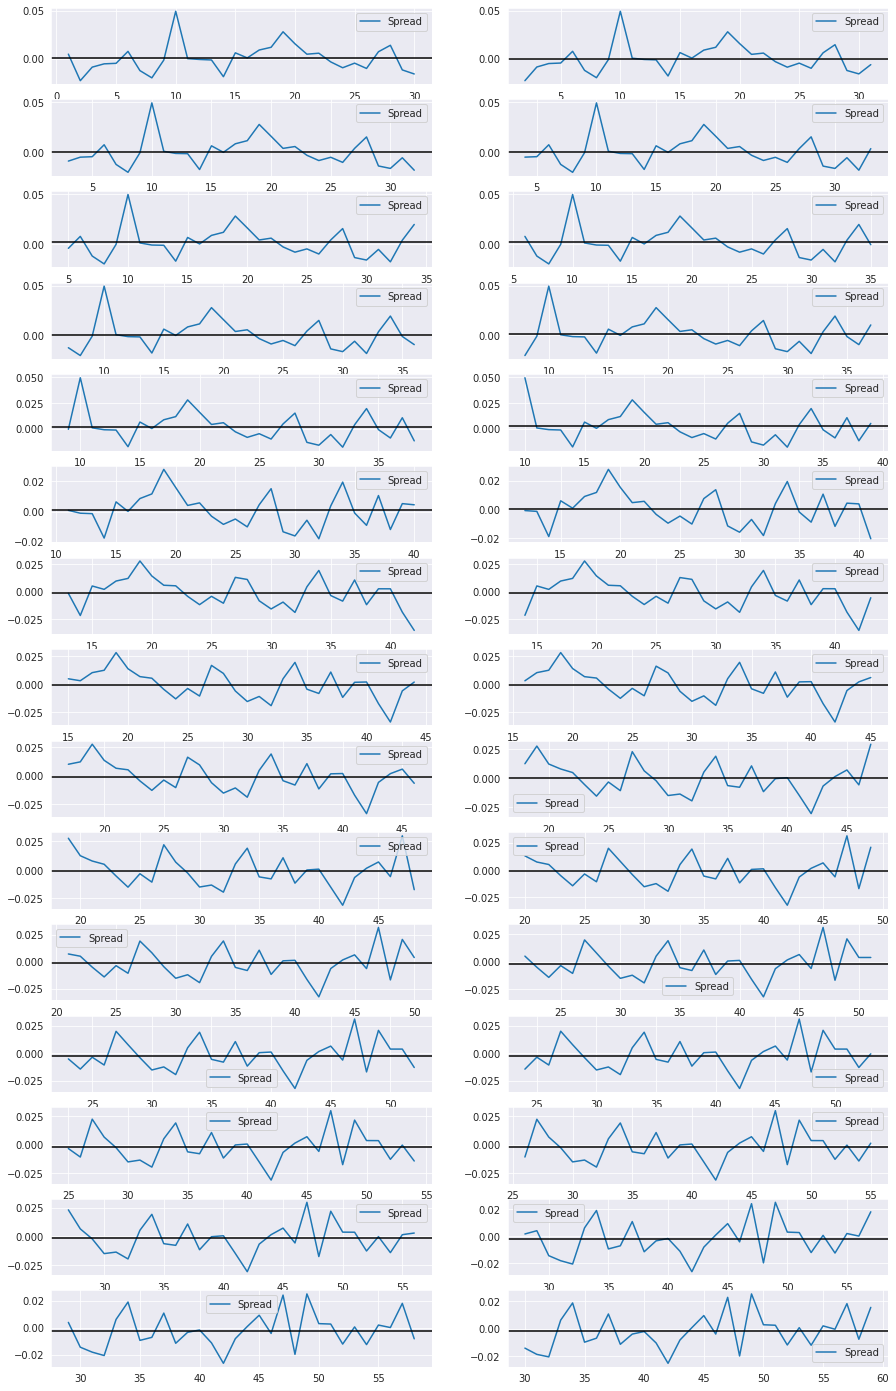

In [166]:
fig = plt.figure(figsize=(15, 25))
c = 0
for i in range(30,len(S1)):
    s1 = S1[c:i]
    s2 = S2[c:i]
    s1 = sm.add_constant(s1)
    results = sm.OLS(s2, s1).fit()
    s1 = s1['close PETR4']
    b = results.params['close PETR4']
    spread = s2 - b * s1
#     print(b)
    plt.subplot(15,2,c+1)
    spread.plot()
    plt.axhline(spread.mean(), color='black')
    plt.legend(['Spread']);    
    c+=1
    if c >= 30:
        break



In [ ]:
len(spread)

In [76]:
# Get the spread between the 2 stocks
# Calculate rolling beta coefficient
rolling_beta = pd.ols(y=S1, x=S2, window_type='rolling', window=30)
spread = S2 - rolling_beta.beta['x'] * S1
spread.name = 'spread'

# Get the 1 day moving average of the price spread
spread_mavg1 = pd.rolling_mean(spread, window=1)
spread_mavg1.name = 'spread 1d mavg'

# Get the 30 day moving average
spread_mavg30 = pd.rolling_mean(spread, window=30)
spread_mavg30.name = 'spread 30d mavg'

plt.plot(spread_mavg1.index, spread_mavg1.values)
plt.plot(spread_mavg30.index, spread_mavg30.values)

plt.legend(['1 Day Spread MAVG', '30 Day Spread MAVG'])

plt.ylabel('Spread');

AttributeError: module 'pandas' has no attribute 'ols'

In [ ]:
import pandas_datareader as pdr
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
%matplotlib inline


In [87]:
endog = S1
exog = sm.add_constant(S2)
rols = RollingOLS(endog, exog, window=20)
rres = rols.fit()
params = rres.params


In [92]:
rres.params.tail()

,const,close ITSA4
696,0.001683,1.363569
697,0.000874,1.388240
698,0.003149,1.350490
699,0.000911,1.406922
700,0.001579,1.355601


In [ ]:
print(params.head())
print(params.tail())

In [ ]:
plt.figure(figsize=[17,5])
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['close BBAS3']
b = results.params['close BBAS3']
spread = S2 - b * S1
spread.plot()
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread']);


In [ ]:
dados = data.iloc[1600:,1:].pct_change()
dados = dados.iloc[1:,1:5]
dados

In [ ]:
a = find_cointegrated_pairs(dados)

In [ ]:
scores, pvalues, pairs = a[0],a[1],a[2]

In [ ]:
symbol_list = ['ABEV3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4']#, 'BBSE3', 'BEEF3', 'BPAC11']#, 'BRAP4', 'BRDT3', 'BRFS3', 'BRKM5', 'BRML3', 'BTOW3', 'CCRO3', 'CIEL3', 'CMIG4', 'COGN3', 'CPFE3', 'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3', 'CYRE3', 'ECOR3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'ENGI11', 'EQTL3', 'FLRY3', 'GGBR4', 'GNDI3', 'GOAU4', 'GOLL4', 'HAPV3', 'HGTX3', 'HYPE3', 'IGTA3', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 'LAME4', 'LREN3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'NTCO3', 'PETR3', 'PETR4', 'QUAL3', 'RADL3', 'RAIL3', 'RENT3', 'SANB11', 'SBSP3', 'SULA11', 'SUZB3', 'TAEE11', 'TIMP3', 'TOTS3', 'UGPA3', 'USIM5', 'VALE3', 'VIVT4', 'VVAR3', 'WEGE3', 'YDUQ3']

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

seaborn.heatmap(pvalues, xticklabels=symbol_list, yticklabels=symbol_list, cmap='RdYlGn_r', mask = (pvalues >= 0.05), ax=ax)


In [ ]:
ppp = pd.DataFrame

In [ ]:
ppp.columns = (map(lambda x: x.symbol, dados.columns))

In [ ]:
ppp.columns